# 绘制引力波曲线

## 数据下载与准备

第一个引力波文件：[H1_Strain.wav](http://python123.io/dv/H1_Strain.wav) （点击下载）

第二个引力波文件：[L1_Strain.wav](http://python123.io/dv/L1_Strain.wav) （点击下载）

引力波参考文件：[wf_template.txt](http://python123.io/dv/wf_template.txt) （点击后保存下载）

将上述文件下载到本地并保存到一个目录中，在该目录中创建一个 Notebook 文件，并依次运行下面的代码行。

## 导入包

本例需要使用到 3 个三方包，下面我们将它们依次导入。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

## 导入数据

接下来我们使用 scipy 包提供的函数导入引力波文件，使用 numpy 包提供的函数导入参考文件。

In [2]:
rate_h, hstrain= wavfile.read(r"H1_Strain.wav","rb")
rate_l, lstrain= wavfile.read(r"L1_Strain.wav","rb")
reftime, ref_H1 = np.genfromtxt('wf_template.txt').transpose() 

# 这里我们使用频率的倒数来确定波的周期
htime_interval = 1/rate_h
ltime_interval = 1/rate_l

### 简单查看数据

In [3]:
# 使用 print() 函数对各项输入的数据进行简单的查看
print(rate_h, hstrain)
print(rate_l, lstrain)
print(reftime, ref_H1)

4096 [8653 9367 9966 ... 1691 2785 2677]
4096 [-19590 -19436 -18830 ... -19416 -18975 -18931]
[-0.62040411 -0.62015997 -0.61991583 ...  0.05488886  0.055133
  0.05537714] [-1.86912777e-22 -1.77827879e-22 -1.68582673e-22 ...  3.58407297e-26
  3.87926155e-26  4.05305739e-26]


## 绘图

In [4]:
# 设定在 Notebook 中使用绘图
%matplotlib inline

接下来我们依次根据 2 个波文件和 1 个参考文件提供的数据绘制波形图，以子图的形式将它们绘制在一起。

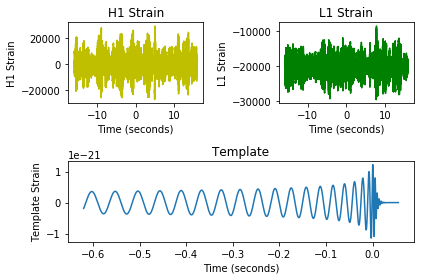

In [5]:
htime_len = hstrain.shape[0]/rate_h
htime = np.arange(-htime_len/2, htime_len/2 , htime_interval)
plt.subplot(2,2,1)
plt.plot(htime, hstrain, 'y')
plt.xlabel('Time (seconds)')
plt.ylabel('H1 Strain')
plt.title('H1 Strain')

ltime_len = lstrain.shape[0]/rate_l
ltime = np.arange(-ltime_len/2, ltime_len/2 , ltime_interval)
plt.subplot(2,2,2)
plt.plot(ltime, lstrain, 'g')
plt.xlabel('Time (seconds)')
plt.ylabel('L1 Strain')
plt.title('L1 Strain')

plt.subplot(2, 1, 2)
plt.plot(reftime, ref_H1)
plt.xlabel('Time (seconds)')
plt.ylabel('Template Strain')
plt.title('Template')
plt.tight_layout()